Аккуратова Дарья Александровна, 337100

студент, 1-й курс, группа S41032, факультет ВШ ЦК

Описание набора данных

Задача:

Кредитные карты являются платежными картами, и они позволяют оплачивать товары и услуги за счет средств банка. Однако у них есть особенность – лимит средств, который ее владелец может использовать на свои нужды. Этот размер устанавливается исходя из платежеспособности держателя. "Незнакомым" клиентам получить кредитную карту в банке гораздо труднее ввиду отсутствия какой-либо информации о клиенте, показывающую его надежность в выплате средств. У каждого банка есть определенные критерии, которым должен соответствовать каждый потенциальный клиент, и на принятие решения о выдаче кредитной карты клиенту влияют все возможные факторы, в совокупности. Так называемые кредитные баллы могут объективно количественно оценить величину риска для банка, так как банк имеет право решать, выдавать ли кредитную карту заявителю или нет. Зачастую каждый случай рассматривается отдельно.
Банки терпят убытки, когда клиент не выплачивает кредит вовремя. Из-за этого каждый год банки несут убытки в миллиарды долларов, а это также в значительной степени влияет на экономический рост страны. Предсказание решения о платежеспособности клиента может сократить убытки банков, тем самым улучшив экономическую ситуацию в регионе.

Цель:

Провести классификацию при помощи методов машинного обучения и оценить важность каждого из атрибутов на принятие решения.

Характеристики атрибутов:

Признаки:

ID – номер клиента,

CODE_GENDER – пол,

FLAG_OWN_CAR – наличие автомобиля,

FLAG_OWN_REALTY – наличие недвижимости,

CNT_CHILDREN – количество детей,

AMT_INCOME_TOTAL – годовой доход,

NAME_INCO_TYPE – категория дохода,

NAME_EDUCATION_TYPE – уровень образования,

NAME_FAMILY_STATUS – семейный статус,

NAME_HOUSING_TYPE – тип жилья,

DAYS_BIRTH – день рождения (следует считать в обратном порядке от текущего дня (0), -1 означает вчерашний день),

DAYS_EMPLOYED – дата начала трудоустройства (следует считать в обратном порядке от текущего дня (0), если положительный, это означает, что человек в настоящее время безработный), 

FLAG_MOBIL – наличие мобильного телефона,

FLAG_WORK_PHONE – наличие рабочего телефона,

FLAG_PHONE – наличие телефона,

FLAG_EMAIL – наличие электронной почты,

OCCUPATION_TYPE – профессия/род занятий,

CNT_FAM_MEMBERS – количество членов семьи,

MONTHS_BALANCE – месяц (месяц извлеченных данных является отправной точкой, считается наоборот, где «0» — текущий месяц, а «-1» — предыдущий месяц и т.д.).

Целевая переменная:

STATUS – статус (0: Просрочка 1-29 дней; 1: Просрочка 30-59 дней; 2: Просрочка 60-89 дней; 3: Просрочка 90-119 дней; 4: Просрочка 120-149; дней 5: Просроченная или безнадежная задолженность, списание более 150 дней; C: погашен в этом месяце; X: нет кредита в течение месяца).

Импорт библиотек.

In [356]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [357]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

Импорт данных и его анализ.

In [358]:
CreditRecord = pd.read_csv('credit_record.csv')
AppRecord = pd.read_csv('application_record.csv')

In [359]:
CreditRecord.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [360]:
CreditRecord.shape

(1048575, 3)

In [361]:
CreditRecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [362]:
#  Описательные статистики для переменных

CreditRecord.describe(include='all')

,ID,MONTHS_BALANCE,STATUS
count,1.048575e+06,1.048575e+06,1048575
unique,NaN,NaN,8
top,NaN,NaN,C
freq,NaN,NaN,442031
mean,5.068286e+06,-1.913700e+01,NaN
std,4.615058e+04,1.402350e+01,NaN
min,5.001711e+06,-6.000000e+01,NaN
25%,5.023644e+06,-2.900000e+01,NaN
50%,5.062104e+06,-1.700000e+01,NaN
75%,5.113856e+06,-7.000000e+00,NaN


In [363]:
AppRecord.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [364]:
AppRecord.shape

(438557, 18)

In [365]:
AppRecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [366]:
#  Описательные статистики для переменных

AppRecord.describe(include='all')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,4.385570e+05,438557,438557,438557,438557.000000,4.385570e+05,438557,438557,438557,438557,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,304354,438557.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,294440,275459,304074,NaN,NaN,226104,301821,299828,393831,NaN,NaN,NaN,NaN,NaN,NaN,78240,NaN
mean,6.022176e+06,NaN,NaN,NaN,0.427390,1.875243e+05,NaN,NaN,NaN,NaN,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,NaN,2.194465
std,5.716370e+05,NaN,NaN,NaN,0.724882,1.100869e+05,NaN,NaN,NaN,NaN,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,NaN,0.897207
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.609375e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,6.047745e+06,NaN,NaN,NaN,0.000000,1.607805e+05,NaN,NaN,NaN,NaN,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,6.456971e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [367]:
print("Общее количество строк в наборе данных записей заявлений: {}".format(len(AppRecord)))
print("Количество уникальных клиентов: {}".format(len(AppRecord.ID.unique())))

Общее количество строк в наборе данных записей заявлений: 438557
Количество уникальных клиентов: 438510


In [368]:
print("Общее количество строк в наборе данных кредитных историй: {}".format(len(CreditRecord)))
print("Количество уникальных клиентов: {}".format(len(CreditRecord.ID.unique())))

Общее количество строк в наборе данных кредитных историй: 1048575
Количество уникальных клиентов: 45985


In [369]:
# Проверка количества совпадений записей в двух наборах данных

len(set(CreditRecord['ID']).intersection(set(AppRecord['ID'])))

36457

Количество уникальных идентификаторов клиентов (ID) в двух наборах данных не совпадает. В наборе кредитных записей клиентов меньше, чем заявок. Пересечение между двумя датасетами составляет 36 457 клиентов.

Пропущенные значения

In [370]:
# Проверяем количество отсутствующих значений в наборе данных записей заявлений

AppRecord.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [371]:
# Проверяем количество отсутствующих значений в наборе данных кредитных историй

CreditRecord.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

Text(0.5, 1.0, 'Отсутствующие значения в наборе данных записей заявления')

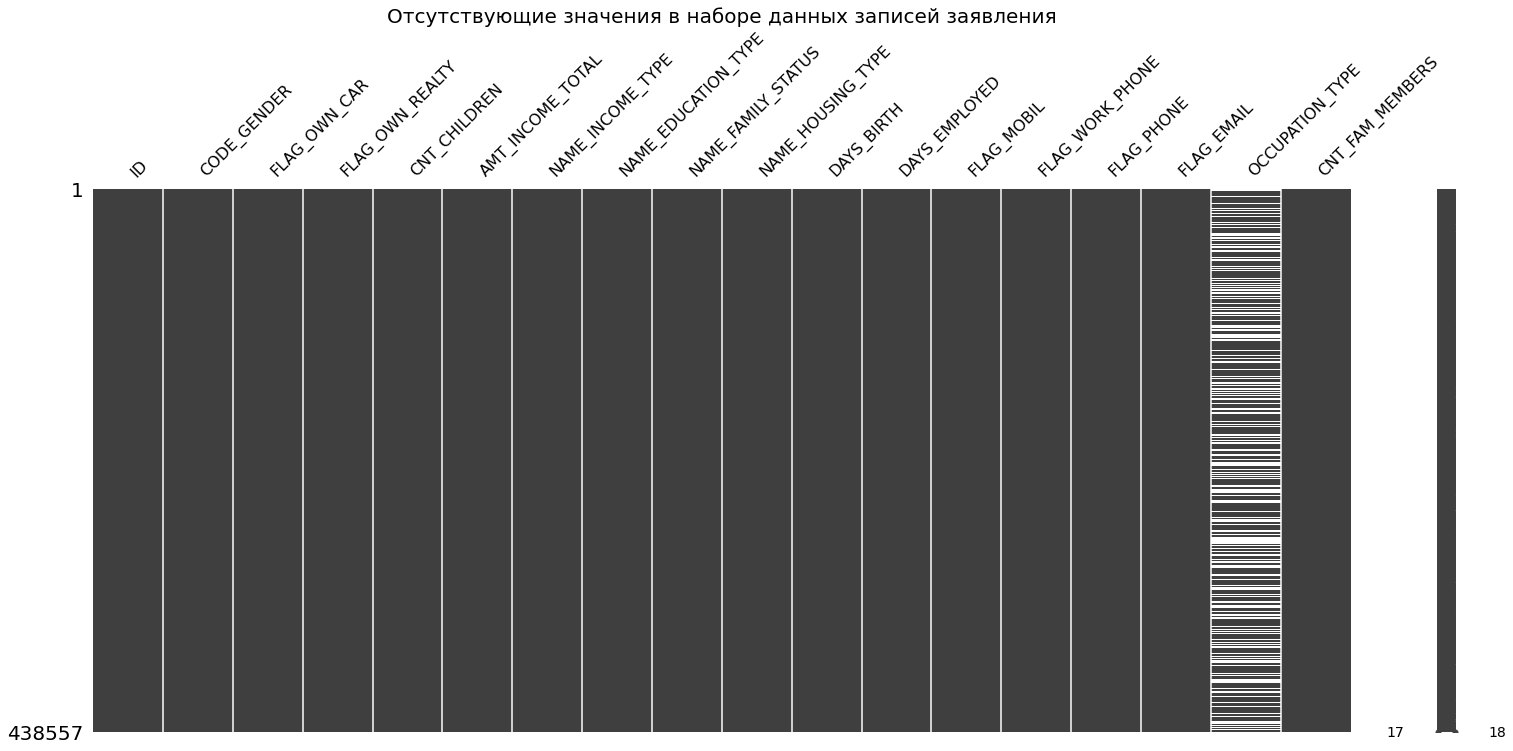

In [372]:
# Визуализируем пропущенные значения в наборе данных записей заявлений

plt_missing_1 = msno.matrix(AppRecord)

plt_missing_1.set_title("Отсутствующие значения в наборе данных записей заявления",fontsize=20)

Text(0.5, 1.0, 'Отсутствующие значения в наборе данных кредитных историй')

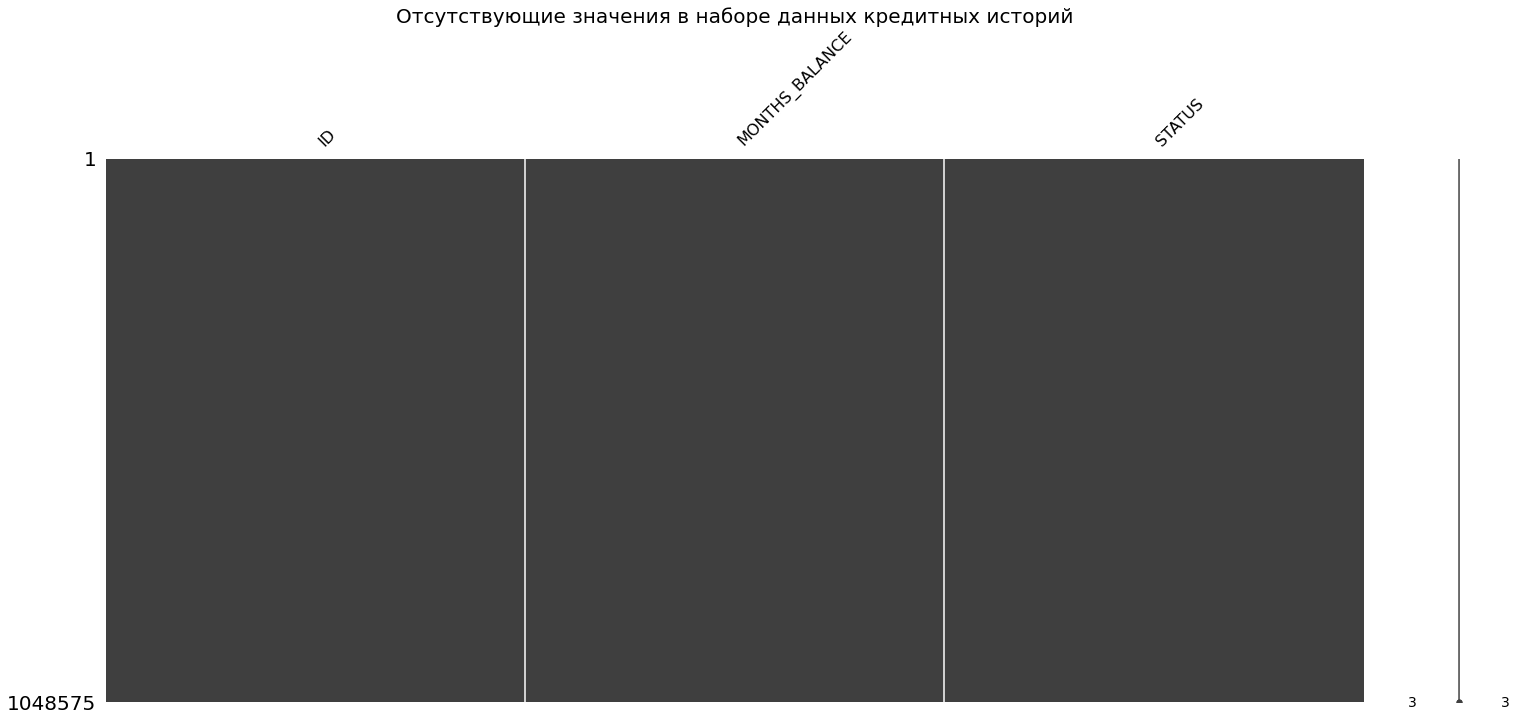

In [373]:
# Визуализируем пропущенные значения в наборе данных кредитных историй

plt_missing_2 = msno.matrix(CreditRecord)

plt_missing_2.set_title("Отсутствующие значения в наборе данных кредитных историй",fontsize=20)

Нулевые значения присутствуют только в атрибуте OCCUPATION_TYPE в наборе данных записей заявлений. В остальних атрибутах пропущенных значений нет.

Уникальные значения

In [374]:
# Посмотрим уникальные значения в наборе данных записей заявлений

unique_counts_1 = pd.DataFrame.from_records([(col, AppRecord[col].nunique()) for col in AppRecord.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts_1

,Column_Name,Num_Unique
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [375]:
# Посмотрим уникальные значения в наборе данных кредитных историй

unique_counts_2 = pd.DataFrame.from_records([(col, CreditRecord[col].nunique()) for col in CreditRecord.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts_2

,Column_Name,Num_Unique
2,STATUS,8
1,MONTHS_BALANCE,61
0,ID,45985


Визуализация данных

In [376]:
# Зададим параметры для построения графиков

sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,
                                             "patch.linewidth": 0.0,
                                             "axes.grid":True,
                                             "grid.linestyle": "-",
                                             "axes.titlesize" : 13,                                       
                                             "figure.autolayout":True})

<Figure size 2160x1440 with 0 Axes>

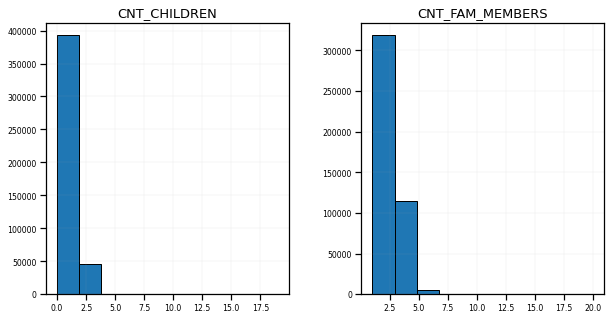

In [377]:
# Построим гистограммы для атрибутов CNT_CHILDREN и CNT_FAM_MEMBERS

plt.figure(figsize=(30,20))

cols_to_plot = ["CNT_CHILDREN", "CNT_FAM_MEMBERS"]
AppRecord[cols_to_plot].hist(edgecolor='black', linewidth=1.0)
fig = plt.gcf()
fig.set_size_inches(10,5)

<Figure size 2160x1440 with 0 Axes>

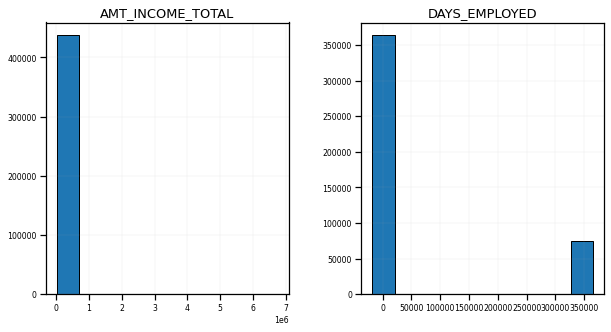

In [378]:
# Построим гистограммы для атрибутов AMT_INCOME_TOTAL и DAYS_EMPLOYED

plt.figure(figsize=(30,20))

cols_to_plot = ["AMT_INCOME_TOTAL", "DAYS_EMPLOYED"]
AppRecord[cols_to_plot].hist(edgecolor='black', linewidth=1.0)
fig = plt.gcf()
fig.set_size_inches(10,5)

<Figure size 2160x1440 with 0 Axes>

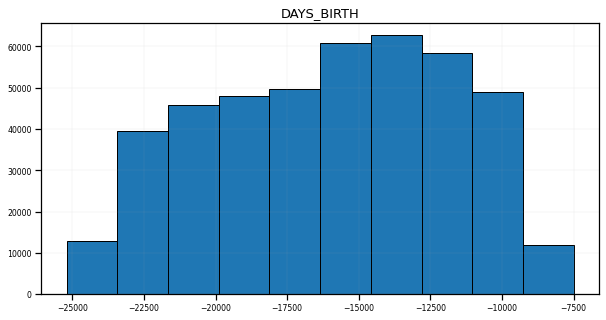

In [379]:
# Построим гистограмму для атрибута DAYS_BIRTH

plt.figure(figsize=(30,20))

cols_to_plot = ["DAYS_BIRTH"]
AppRecord[cols_to_plot].hist(edgecolor='black', linewidth=1.0)
fig = plt.gcf()
fig.set_size_inches(10,5)

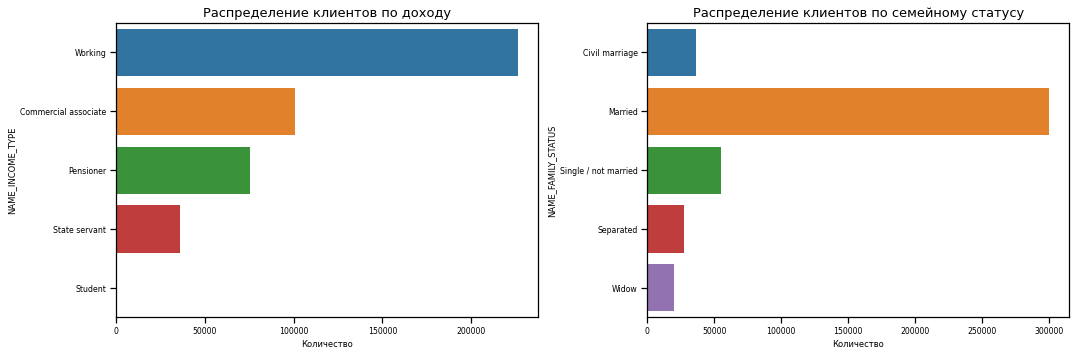

In [380]:
# Построим гистограммы для атрибутов NAME_INCOME_TYPE и NAME_FAMILY_STATUS

fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=AppRecord.NAME_INCOME_TYPE, ax=axes[0])
g1.set_title("Распределение клиентов по доходу")
g1.set_xlabel("Количество")

g2=sns.countplot(y=AppRecord.NAME_FAMILY_STATUS, ax=axes[1])
g2.set_title("Распределение клиентов по семейному статусу")
g2.set_xlabel("Количество")

fig.set_size_inches(15,5)
plt.tight_layout()
plt.show()

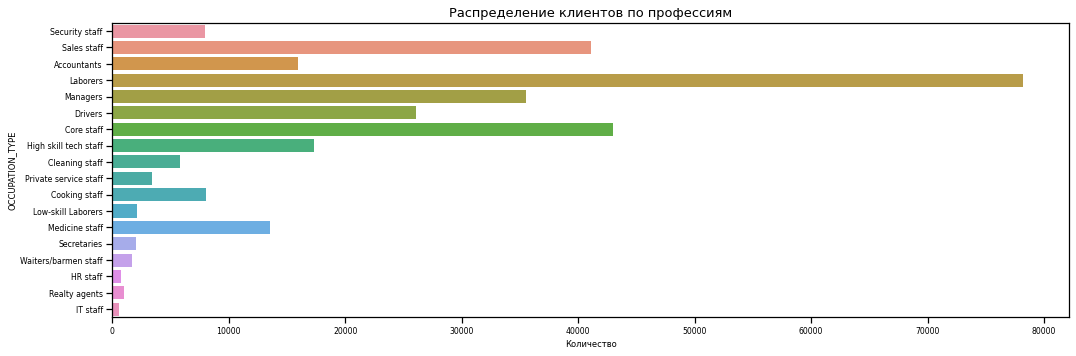

In [381]:
# Построим гистограммы для атрибута OCCUPATION_TYPE

fig, axes = plt.subplots(1,1)

g3=sns.countplot(y=AppRecord.OCCUPATION_TYPE) 
g3.set_title("Распределение клиентов по профессиям")
g3.set_xlabel("Количество")

fig.set_size_inches(15,5)
plt.tight_layout()
plt.show()

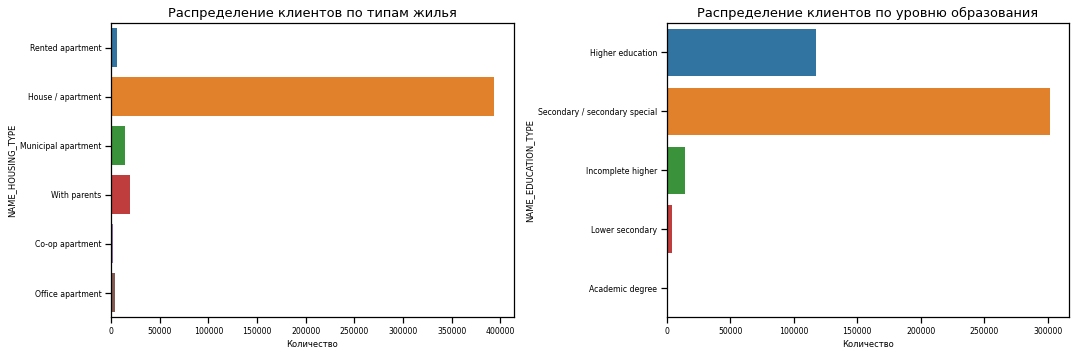

In [382]:
# Построим гистограммы для атрибутов NAME_HOUSING_TYPE и NAME_EDUCATION_TYPE

fig, axes = plt.subplots(1,2)

g4=sns.countplot(y=AppRecord.NAME_HOUSING_TYPE, ax=axes[0])
g4.set_title("Распределение клиентов по типам жилья")
g4.set_xlabel("Количество")

g5=sns.countplot(y=AppRecord.NAME_EDUCATION_TYPE, ax=axes[1])
g5.set_title("Распределение клиентов по уровню образования")
g5.set_xlabel("Количество")

fig.set_size_inches(15,5)
plt.tight_layout()
plt.show()

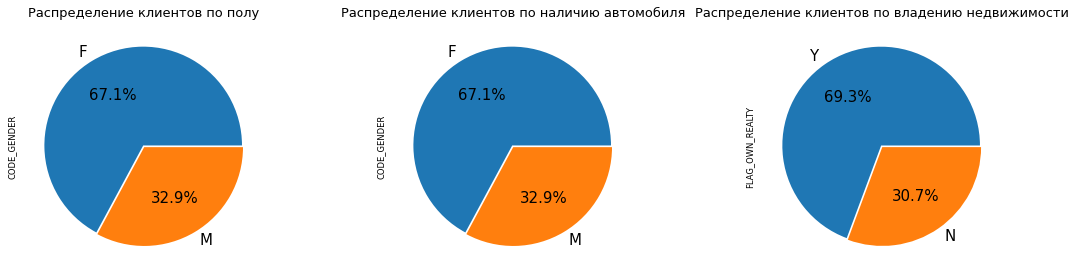

In [383]:
# Построим круговые диаграммы для атрибутов CODE_GENDER, CODE_GENDER и FLAG_OWN_REALTY

fig, axes = plt.subplots(1,3)

g1=AppRecord['CODE_GENDER'].value_counts().plot.pie(explode=[0.01,0.01], 
                                                     autopct='%1.1f%%', 
                                                     textprops = {'fontsize':15}, 
                                                     ax=axes[0])
g1.set_title("Распределение клиентов по полу")

g2=AppRecord['CODE_GENDER'].value_counts().plot.pie(explode=[0.01,0.01], 
                                                      autopct='%1.1f%%', 
                                                      textprops = {'fontsize':15}, 
                                                      ax=axes[1])
g2.set_title("Распределение клиентов по наличию автомобиля")

g3=AppRecord['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0.01,0.01], 
                                                         autopct='%1.1f%%', 
                                                         textprops = {'fontsize':15}, 
                                                         ax=axes[2])
g3.set_title("Распределение клиентов по владению недвижимости")

fig.set_size_inches(15,5)
plt.tight_layout()
plt.show() 

Предварительная обработка данных

In [384]:
# Удалим повторяющиеся значения и сохраним только последнюю запись ID, если она повторяется

AppRecord = AppRecord.drop_duplicates('ID', keep='last')

# Отбросим значения OCCUPATION_TYPE (типов профессий), тк именно в этом атрибуте было очень много пропущенных значений

AppRecord.drop('OCCUPATION_TYPE', axis=1, inplace=True) 

In [385]:
# Посмотрим на уникальные значения для столбцов с типом "object".
# Таким образом мы отфильтровали столбцы с нечисловыми значениями

object_columns = AppRecord.columns[AppRecord.dtypes =='object'].tolist()

unique_counts = pd.DataFrame.from_records([(col, AppRecord[object_columns][col].nunique()) for col in AppRecord[object_columns].columns],
                                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

unique_counts 

,Column_Name,Num_Unique
0,CODE_GENDER,2
1,FLAG_OWN_CAR,2
2,FLAG_OWN_REALTY,2
3,NAME_INCOME_TYPE,5
4,NAME_EDUCATION_TYPE,5
5,NAME_FAMILY_STATUS,5
6,NAME_HOUSING_TYPE,6


In [386]:
# Объединим оба набора данных

open_month=pd.DataFrame(CreditRecord.groupby(["ID"])["MONTHS_BALANCE","STATUS"].agg(min))
customer_data=pd.merge(AppRecord,open_month,how="left",on="ID")

# Преобразуем категориальные значения из вышеперечисленных столбцов в числовые значения

customer_data["CODE_GENDER"] =  customer_data['CODE_GENDER'].replace(['F','M'],[0,1])
customer_data["FLAG_OWN_CAR"] = customer_data["FLAG_OWN_CAR"].replace(["Y","N"],[1,0])
customer_data["FLAG_OWN_REALTY"] = customer_data["FLAG_OWN_REALTY"].replace(["Y","N"],[1,0])
customer_data["Is_Working"] = customer_data["NAME_INCOME_TYPE"].replace(
    ["Working","Commercial associate","State servant","Pensioner","Student"],[1,1,1,0,0])
customer_data["In_Relationship"] = customer_data["NAME_FAMILY_STATUS"].replace(
    ["Civil marriage","Married","Single / not married","Separated","Widow"],[1,1,0,0,0])

NAME_HOUSING_TYPE_ = {'House / apartment' : 'House / apartment',
                            'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                        'Rented apartment': 'House / apartment',
                        'Office apartment': 'House / apartment',
                         'Co-op apartment': 'House / apartment'}
customer_data["NAME_HOUSING_TYPE"] = customer_data['NAME_HOUSING_TYPE'].map(NAME_HOUSING_TYPE_)

NAME_EDUCATION_TYPE_ = {'Secondary / secondary special':'Secondary',
                                      'Lower secondary':'Secondary',
                                     'Higher education':'Higher education',
                                    'Incomplete higher':'Higher education',
                                      'Academic degree':'Academic degree'}
customer_data["NAME_EDUCATION_TYPE"] = customer_data["NAME_EDUCATION_TYPE"].map(NAME_EDUCATION_TYPE_)

NAME_INCOME_TYPE_ = {'Commercial associate':'Working',
                            'State servant':'Working',
                                  'Working':'Working',
                                'Pensioner':'Pensioner',
                                  'Student':'Student'}
customer_data["NAME_INCOME_TYPE"] = customer_data["NAME_INCOME_TYPE"].map(NAME_INCOME_TYPE_)

NAME_FAMILY_STATUS_ = {'Single / not married':'Single',
                                  'Separated':'Single',
                                      'Widow':'Single',
                             'Civil marriage':'Married',
                                    'Married':'Married'}
customer_data["NAME_FAMILY_STATUS"] = customer_data["NAME_FAMILY_STATUS"].map(NAME_FAMILY_STATUS_)

# Преобразуем дату рождения в возраст, а дни трудоустройства в года

customer_data["AGE"] = round((customer_data.DAYS_BIRTH/365)*(-1))

customer_data["EXPERIENCE"] = customer_data.DAYS_EMPLOYED/365
customer_data["EXPERIENCE"] = customer_data["EXPERIENCE"].apply(lambda v : int(v*(-1)) if v <0 else 0)

# Удалим атрибуты DAYS_EMPLOYED и DAYS_BIRTH ввиду их преобразования в значения AGE и EXPERIENCE

customer_data=customer_data.drop(columns=['DAYS_EMPLOYED','DAYS_BIRTH'])

In [387]:
# Преобразуем категориальные значения в числовые

customer_data = pd.get_dummies(customer_data, columns=['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                                                       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'])

In [388]:
# Посмотрим на результат

customer_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,...,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_With parents
0,5008804,1,1,1,0,427500.0,1,1,0,0,...,0,0,1,0,1,0,1,0,1,0
1,5008805,1,1,1,0,427500.0,1,1,0,0,...,0,0,1,0,1,0,1,0,1,0
2,5008806,1,1,1,0,112500.0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0
3,5008808,0,0,1,0,270000.0,1,0,1,1,...,0,0,1,0,0,1,0,1,1,0
4,5008809,0,0,1,0,270000.0,1,0,1,1,...,0,0,1,0,0,1,0,1,1,0


In [389]:
customer_data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS',
       'Is_Working', 'In_Relationship', 'AGE', 'EXPERIENCE',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Secondary',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Single',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_With parents'],
      dtype='object')

In [390]:
# Построим боксплоты для столбцов с числовыми значениями, чтобы уточнить наличие или отсутствие выбросов

other_numerical_cols = ["AMT_INCOME_TOTAL","CNT_CHILDREN","CNT_FAM_MEMBERS",
                        "AGE", "EXPERIENCE"]

fig = make_subplots(rows=5, cols=1, start_cell="bottom-left",
                   subplot_titles=("AMT_INCOME_TOTAL","CNT_CHILDREN","CNT_FAM_MEMBERS",
                        "AGE", "EXPERIENCE"))

fig.add_trace(go.Box(x=customer_data.AMT_INCOME_TOTAL, name="AMT_INCOME_TOTAL",boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=customer_data.CNT_CHILDREN, name="CNT_CHILDREN", boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=customer_data.CNT_FAM_MEMBERS, name="CNT_FAM_MEMBERS", boxmean=True), row=3, col=1)
fig.add_trace(go.Box(x=customer_data.AGE, name="AGE", boxmean=True),row=4, col=1)
fig.add_trace(go.Box(x=customer_data.EXPERIENCE, name="EXPERIENCE", boxmean=True),row=5, col=1)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

Отбросим выбросы, основываясь на межквартильном расстоянии. В данном случае удалим значения, не входящие в диапазон:
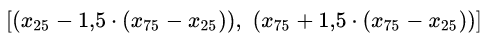

где x25 - квартиль 25%, x75 - квартиль 75%, x75-x25 - межквартильный размах.

In [391]:
# Подсчитаем квартили 25% и 75%

quantile1_1, quantile3_1 = np.percentile(customer_data["AMT_INCOME_TOTAL"],[25,75]) 
quantile1_2, quantile3_2 = np.percentile(customer_data["CNT_CHILDREN"],[25,75]) 
quantile1_3, quantile3_3 = np.percentile(customer_data["CNT_FAM_MEMBERS"],[25,75]) 
quantile1_4, quantile3_4 = np.percentile(customer_data["AGE"],[25,75]) 
quantile1_5, quantile3_5 = np.percentile(customer_data["EXPERIENCE"],[25,75]) 

# Найдем межквартильный размах

iqr_value_1 = quantile3_1 - quantile1_1
iqr_value_2 = quantile3_2 - quantile1_2
iqr_value_3 = quantile3_3 - quantile1_3
iqr_value_4 = quantile3_4 - quantile1_4
iqr_value_5 = quantile3_5 - quantile1_5

# Найдем нижнюю и верхнюю границу значений

lower_bound_val_1 = quantile1_1 - (1.5 * iqr_value_1)
upper_bound_val_1 = quantile3_1 + (1.5 * iqr_value_1)
lower_bound_val_2 = quantile1_2 - (1.5 * iqr_value_2)
upper_bound_val_2 = quantile3_2 + (1.5 * iqr_value_2)
lower_bound_val_3 = quantile1_3 - (1.5 * iqr_value_3)
upper_bound_val_3 = quantile3_3 + (1.5 * iqr_value_3)
lower_bound_val_4 = quantile1_4 - (1.5 * iqr_value_4)
upper_bound_val_4 = quantile3_4 + (1.5 * iqr_value_4)
lower_bound_val_5 = quantile1_5 - (1.5 * iqr_value_5)
upper_bound_val_5 = quantile3_5 + (1.5 * iqr_value_5)

print(f"Для AMT_INCOME_TOTAL:\n 25%: {quantile1_1}, 75%: {quantile3_1}, IQR: {iqr_value_1}, нижняя граница: {lower_bound_val_1}, верхняя граница: {upper_bound_val_1}")
print(f"Для CNT_CHILDREN:\n 25%: {quantile1_2}, 75%: {quantile3_2}, IQR: {iqr_value_2}, нижняя граница: {lower_bound_val_2}, верхняя граница: {upper_bound_val_2}")
print(f"Для CNT_FAM_MEMBERS:\n 25%: {quantile1_3}, 75%: {quantile3_3}, IQR: {iqr_value_3}, нижняя граница: {lower_bound_val_3}, верхняя граница: {upper_bound_val_3}")
print(f"Для AGE:\n 25%: {quantile1_4}, 75%: {quantile3_4}, IQR: {iqr_value_4}, нижняя граница: {lower_bound_val_4}, верхняя граница: {upper_bound_val_4}")
print(f"Для EXPERIENCE:\n 25%: {quantile1_5}, 75%: {quantile3_5}, IQR: {iqr_value_5}, нижняя граница: {lower_bound_val_5}, верхняя граница: {upper_bound_val_5}")

Для AMT_INCOME_TOTAL:
 25%: 121500.0, 75%: 225000.0, IQR: 103500.0, нижняя граница: -33750.0, верхняя граница: 380250.0
Для CNT_CHILDREN:
 25%: 0.0, 75%: 1.0, IQR: 1.0, нижняя граница: -1.5, верхняя граница: 2.5
Для CNT_FAM_MEMBERS:
 25%: 2.0, 75%: 3.0, IQR: 1.0, нижняя граница: 0.5, верхняя граница: 4.5
Для AGE:
 25%: 34.0, 75%: 53.0, IQR: 19.0, нижняя граница: 5.5, верхняя граница: 81.5
Для EXPERIENCE:
 25%: 1.0, 75%: 8.0, IQR: 7.0, нижняя граница: -9.5, верхняя граница: 18.5


In [392]:
# Удалим выбросы

customer_data = customer_data.loc[customer_data["AMT_INCOME_TOTAL"] >= -33750.0]
customer_data = customer_data.loc[customer_data["AMT_INCOME_TOTAL"] <= 380250.0]
customer_data = customer_data.loc[customer_data["CNT_CHILDREN"] >= -1.5]
customer_data = customer_data.loc[customer_data["CNT_CHILDREN"] <= 2.5]
customer_data = customer_data.loc[customer_data["CNT_FAM_MEMBERS"] >= 0.5]
customer_data = customer_data.loc[customer_data["CNT_FAM_MEMBERS"] <= 4.5]
customer_data = customer_data.loc[customer_data["AGE"] >= 5.5]
customer_data = customer_data.loc[customer_data["AGE"] <= 81.5]
customer_data = customer_data.loc[customer_data["EXPERIENCE"] >= -9.5]
customer_data = customer_data.loc[customer_data["EXPERIENCE"] <= 18.5]

In [393]:
# Построим боксплоты, чтобы проверить отсутствие выбросов

other_numerical_cols = ["AMT_INCOME_TOTAL","CNT_CHILDREN","CNT_FAM_MEMBERS",
                        "AGE", "EXPERIENCE"]

fig = make_subplots(rows=5, cols=1, start_cell="bottom-left",
                   subplot_titles=("AMT_INCOME_TOTAL","CNT_CHILDREN","CNT_FAM_MEMBERS",
                        "AGE", "EXPERIENCE"))

fig.add_trace(go.Box(x=customer_data.AMT_INCOME_TOTAL, name="AMT_INCOME_TOTAL",boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=customer_data.CNT_CHILDREN, name="CNT_CHILDREN", boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=customer_data.CNT_FAM_MEMBERS, name="CNT_FAM_MEMBERS", boxmean=True), row=3, col=1)
fig.add_trace(go.Box(x=customer_data.AGE, name="AGE", boxmean=True),row=4, col=1)
fig.add_trace(go.Box(x=customer_data.EXPERIENCE, name="EXPERIENCE", boxmean=True),row=5, col=1)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [394]:
 # Посмотрим на количество уникальных значений в целевой переменной STATUS
 
 customer_data["STATUS"].value_counts().sort_index()

0    28562
1       29
2        2
3        1
4        4
5        1
C      992
X     2963
Name: STATUS, dtype: int64

In [395]:
# Преобразуем значения атрибута STATUS в бинарные,
# где статус 0,1,2,3,4,5 относит к неплатежеспособным клиентам (1), 
# а C,X - к платежеспособным клиентам (0)

map_status = {'C' : 1,
              'X' : 1,
              '0' : 0,
              '1' : 0,
              '2' : 0,
              '3' : 0,
              '4' : 0,
              '5' : 0}

customer_data["STATUS"] = customer_data["STATUS"].map(map_status)

In [396]:
# Проверим сбалансированность выборки
 
customer_data["STATUS"].value_counts()

0.0    28599
1.0     3955
Name: STATUS, dtype: int64

In [397]:
customer_data["STATUS"].value_counts(normalize=True)

0.0    0.87851
1.0    0.12149
Name: STATUS, dtype: float64

Выборка не сбалансированная, т.к. разница между классами 7.23 раз.

In [398]:
# Получим новый датафрейм только со значением STATUS == 1

df_one = customer_data.loc[customer_data["STATUS"] == 1]
df_one.shape

(3955, 27)

In [399]:
# Получим новый датафрейм только со значением STATUS == 0

df_zero = customer_data.loc[customer_data["STATUS"] == 0]
df_zero.shape

(28599, 27)

In [400]:
# Создадим новый датафрейм, состоящий из набора данных со значением отклика STATUS == 1 (3955*7=27685 строк)
# и набора данных со значением отклика STATUS == 0 (28599 строк)

df_new = pd.concat([df_one, df_one, df_one, df_one, df_one, df_one, df_one, df_zero], ignore_index=True)
df_new.shape

(56284, 27)

In [401]:
# Проверим сбалансированность выборки нового датафрейма

df_new["STATUS"].value_counts()

0.0    28599
1.0    27685
Name: STATUS, dtype: int64

In [402]:
df_new["STATUS"].value_counts(normalize=True)

0.0    0.50812
1.0    0.49188
Name: STATUS, dtype: float64

Выборка сбалансирована.

Обучение моделей.

In [403]:
#  Разделим на предикторы и отклики

X = df_new.drop(["STATUS"], axis=1)
y = df_new["STATUS"] 

In [404]:
X

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,...,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_With parents
0,5008809,0,0,1,0,270000.0,1,0,1,1,...,0,0,1,0,0,1,0,1,1,0
1,5008819,1,1,1,0,135000.0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0
2,5008857,0,1,1,2,135000.0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0
3,5112846,0,1,1,2,135000.0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0
4,5008893,0,0,1,0,297000.0,1,0,0,0,...,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56279,5149828,1,1,1,0,315000.0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0
56280,5149834,0,0,1,0,157500.0,1,0,1,1,...,0,0,1,0,1,0,1,0,1,0
56281,5149838,0,0,1,0,157500.0,1,0,1,1,...,1,0,0,0,1,0,1,0,1,0
56282,5150049,0,0,1,0,283500.0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0


In [405]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
56279    0.0
56280    0.0
56281    0.0
56282    0.0
56283    0.0
Name: STATUS, Length: 56284, dtype: float64

In [406]:
# Разделими на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 1234)  

KNN

In [407]:
# Стандартизация предикторов

scaler = StandardScaler()   #   среднее 0, ст.отклонение 1
scaler.fit(X_train)

# Одинаковые параметры стандартизации у обучающего и тестового множества

X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test)

In [408]:
#  Построение классификатора KNN

model_KNN = KNeighborsClassifier(n_neighbors=5,      # число ближайших соседей
                                 algorithm='auto',   # как искать ближайших соседей
                                 leaf_size=30,       
                                 metric='minkowski', # расстояние между объектами
                                 p=2,                # расстояние Минковского  превращается в евклидово
                                 metric_params=None, # используем для самодельных расстояний
                                 n_jobs=1,           # число процессов
                                 weights='uniform')  # все наблюдения равноправны

params_KNN = {
              'n_neighbors': [3, 5],
              'leaf_size': [20, 30]
             }

grid_KNN = GridSearchCV(estimator=model_KNN,
                        param_grid=params_KNN,
                        scoring='accuracy',
                        cv=5,                  # количество фолдов
                        n_jobs=1)

# Обучение на обучающей выборке

grid_KNN.fit(X_train_2, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=1), n_jobs=1,
             param_grid={'leaf_size': [20, 30], 'n_neighbors': [3, 5]},
             scoring='accuracy')

In [409]:
# Лучшие значения гиперпараметров

grid_KNN.best_estimator_

KNeighborsClassifier(leaf_size=20, n_jobs=1, n_neighbors=3)

In [410]:
y_pred_KNN = grid_KNN.predict(X_test_2)

In [411]:
print('Accuracy на тестовой выборке:', accuracy_score(y_test, y_pred_KNN))

Accuracy на тестовой выборке: 0.8855927640788198


No handles with labels found to put in legend.


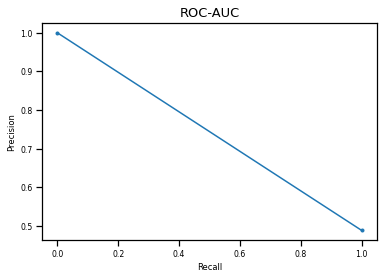

In [412]:
prediction_KNN = grid_KNN.best_estimator_.predict_proba(X_test)[:, 1]
precision, recall, th = precision_recall_curve(y_test, prediction_KNN)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

In [413]:
# Строим предсказание модели

y_pred_train_KNN = grid_KNN.predict(X_train_2)
y_pred_test_KNN = grid_KNN.predict(X_test_2)

In [414]:
# Таблица сопряженности. Измеряем, насколько хороша модель

# Обучающая выборка

print(u'Таблица сопряженности для обучающей выборки')

conf_mat = metrics.confusion_matrix(y_train, y_pred_train_KNN)
conf_mat = pd.DataFrame(conf_mat, index=grid_KNN.classes_, columns=grid_KNN.classes_)
conf_mat

Таблица сопряженности для обучающей выборки


,0.0,1.0
0.0,16804,2293
1.0,7,18606


In [415]:
# Тестовая выборка

print(u'Таблица сопряженности для тестовой выборки')

conf_mat = metrics.confusion_matrix(y_test, y_pred_test_KNN)
conf_mat = pd.DataFrame(conf_mat, index=grid_KNN.classes_, columns=grid_KNN.classes_)
conf_mat

Таблица сопряженности для тестовой выборки


,0.0,1.0
0.0,7419,2083
1.0,42,9030


In [416]:
# Посчитаем precision, recall и f1-score для обучающей выборки

print(metrics.classification_report(y_train, y_pred_train_KNN))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94     19097
         1.0       0.89      1.00      0.94     18613

    accuracy                           0.94     37710
   macro avg       0.94      0.94      0.94     37710
weighted avg       0.95      0.94      0.94     37710



In [417]:
# Посчитаем precision, recall и f1-score для тестовой выборки

print(metrics.classification_report(y_test, y_pred_test_KNN))

              precision    recall  f1-score   support

         0.0       0.99      0.78      0.87      9502
         1.0       0.81      1.00      0.89      9072

    accuracy                           0.89     18574
   macro avg       0.90      0.89      0.88     18574
weighted avg       0.91      0.89      0.88     18574



Gradient Boosting

In [418]:
#  Построение классификатора GradientBoostingClassifier

model_GB = GradientBoostingClassifier(random_state=42,                                  
                                   subsample=0.66,                                  
                                   max_features='sqrt',                                 
                                   n_estimators=500,              # Число деревьев                  
                                   loss='deviance',               # критерий качества ‘deviance’ (кросс-энтропия) или ‘exponential’ (как в AdaBoost)
                                   learning_rate=0.01,            # параметр, который умножаем на лямбда                               
                                   criterion='friedman_mse',      # загрязнение дерева измеряем “friedman_mse”  (mse с улучшениями)                                 
                                   min_impurity_decrease=0.001,   # минимальное уменьшение загрязнения                             
                                   min_samples_leaf=5,                                 
                                   min_samples_split=10,                                 
                                   max_depth=5,                             
                                   verbose=0)                      # насколько подробны должны быть промежуточные результаты                          

params_GB = {  
    'n_estimators': [70, 80],
    'max_depth': [6, 8],
    'max_features': [5, 7],
    'min_samples_split': [5, 6],
    'min_samples_leaf': [5, 7],
  }

grid_GB = GridSearchCV(model_GB, param_grid=params_GB, cv=3,   # 3 фолда                        
                               scoring='accuracy',                     #  выбор критерия качества                
                               error_score='raise',                  #  поведение в случае ошибки при вычислении критерия качества                   
                               refit=True,                           #  обучить модель с лучшими значениями параметроы
                               pre_dispatch=None, 
                               verbose=0)

# Обучение на обучающей выборке

grid_GB.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  max_depth=5,
                                                  max_features='sqrt',
                                                  min_impurity_decrease=0.001,
                                                  min_samples_leaf=5,
                                                  min_samples_split=10,
                                                  n_estimators=500,
                                                  random_state=42,
                                                  subsample=0.66),
             param_grid={'max_depth': [6, 8], 'max_features': [5, 7],
                         'min_samples_leaf': [5, 7],
                         'min_samples_split': [5, 6],
                         'n_estimators': [70, 80]},
             pre_dispatch=None, scoring='accuracy')

In [419]:
# Лучший набор значений гиперпараметров

best_GB = grid_GB.best_params_
print('Лучшие значения гиперпараметров:\n', best_GB)

Лучшие значения гиперпараметров:
 {'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 80}


In [420]:
y_pred_GB = grid_GB.predict(X_test)

In [421]:
print('ROC AUC на тестовой выборке:', accuracy_score(y_test, y_pred_GB))

ROC AUC на тестовой выборке: 0.7128782168622806


No handles with labels found to put in legend.


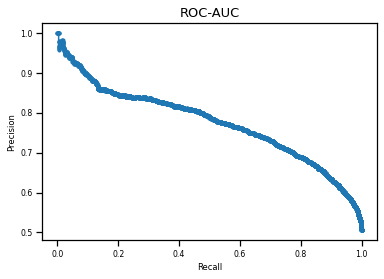

In [422]:
prediction_GB = grid_GB.best_estimator_.predict_proba(X_test)[:, 1]
precision, recall, th = precision_recall_curve(y_test, prediction_GB)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

In [423]:
# Строим предсказание модели

y_pred_train_GB = grid_GB.predict(X_train)
y_pred_test_GB = grid_GB.predict(X_test)

In [424]:
# Таблица сопряженности. Измеряем, насколько хороша модель

# Обучающая выборка

print(u'Таблица сопряженности для обучающей выборки')

conf_mat = metrics.confusion_matrix(y_train, y_pred_train_GB)
conf_mat = pd.DataFrame(conf_mat, index=grid_GB.classes_, columns=grid_GB.classes_)
conf_mat

Таблица сопряженности для обучающей выборки


,0.0,1.0
0.0,16195,2902
1.0,7104,11509


In [425]:
# Тестовая выборка

print(u'Таблица сопряженности для тестовой выборки')

conf_mat = metrics.confusion_matrix(y_test, y_pred_test_GB)
conf_mat = pd.DataFrame(conf_mat, index=grid_GB.classes_, columns=grid_GB.classes_)
conf_mat

Таблица сопряженности для тестовой выборки


,0.0,1.0
0.0,7796,1706
1.0,3627,5445


In [426]:
# Посчитаем precision, recall и f1-score для обучающей выборки

print(metrics.classification_report(y_train, y_pred_train_GB))

              precision    recall  f1-score   support

         0.0       0.70      0.85      0.76     19097
         1.0       0.80      0.62      0.70     18613

    accuracy                           0.73     37710
   macro avg       0.75      0.73      0.73     37710
weighted avg       0.75      0.73      0.73     37710



In [427]:
# Посчитаем precision, recall и f1-score для тестовой выборки

print(metrics.classification_report(y_test, y_pred_test_GB))

              precision    recall  f1-score   support

         0.0       0.68      0.82      0.75      9502
         1.0       0.76      0.60      0.67      9072

    accuracy                           0.71     18574
   macro avg       0.72      0.71      0.71     18574
weighted avg       0.72      0.71      0.71     18574



XGBoost

In [428]:
# Построение классификатора XGBClassifier

model_XGB = XGBClassifier(seed=42,             # зерно датчика случайных чисел
                      n_estimators=300,        # число деревьев
                      max_depth=6,             # максимальная глубина дерева
                      learning_rate=0.1)       # скорость обучения 

params_XGB = {
              'max_depth': [4, 6],
              'n_estimators': [300, 500],
              'learning_rate': [0.1, 0.3]
             }

grid_XGB = GridSearchCV(estimator=model_XGB,
       param_grid=params_XGB,
       scoring='accuracy',
       cv=5,
       n_jobs=-1)

# Обучаем на обучающей выборке

grid_XGB.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(max_depth=6, n_estimators=300, seed=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [4, 6],
                         'n_estimators': [300, 500]},
             scoring='accuracy')

In [429]:
# Лучший набор значений гиперпараметров

best_XGB = grid_XGB.best_params_
print('Лучшие значения гиперпараметров:\n', best_XGB)

Лучшие значения гиперпараметров:
 {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 500}


In [430]:
y_pred_XGB = grid_XGB.predict(X_test)

In [431]:
print('Accuracy на тестовой выборке:', accuracy_score(y_test, y_pred_XGB))

Accuracy на тестовой выборке: 0.9252718854312479


No handles with labels found to put in legend.


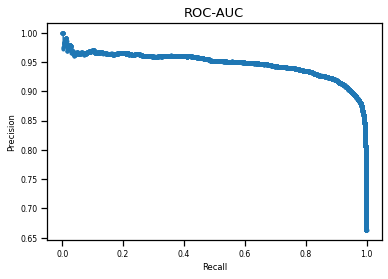

In [432]:
prediction_XGB = grid_XGB.best_estimator_.predict_proba(X_test)[:, 1]
precision, recall, th = precision_recall_curve(y_test, prediction_XGB)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

In [433]:
# Строим предсказание модели

y_pred_train_XGB = grid_XGB.predict(X_train)
y_pred_test_XGB = grid_XGB.predict(X_test)

In [434]:
# Таблица сопряженности. Измеряем, насколько хороша модель

# Обучающая выборка

print(u'Таблица сопряженности для обучающей выборки')

conf_mat = metrics.confusion_matrix(y_train, y_pred_train_XGB)
conf_mat = pd.DataFrame(conf_mat, index=grid_XGB.classes_, columns=grid_XGB.classes_)
conf_mat

Таблица сопряженности для обучающей выборки


,0.0,1.0
0.0,18184,913
1.0,119,18494


In [435]:
# Тестовая выборка

print(u'Таблица сопряженности для тестовой выборки')

conf_mat = metrics.confusion_matrix(y_test, y_pred_test_XGB)
conf_mat = pd.DataFrame(conf_mat, index=grid_XGB.classes_, columns=grid_XGB.classes_)
conf_mat

Таблица сопряженности для тестовой выборки


,0.0,1.0
0.0,8282,1220
1.0,168,8904


In [436]:
# Посчитаем precision, recall и f1-score для обучающей выборки

print(metrics.classification_report(y_train, y_pred_train_XGB))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     19097
         1.0       0.95      0.99      0.97     18613

    accuracy                           0.97     37710
   macro avg       0.97      0.97      0.97     37710
weighted avg       0.97      0.97      0.97     37710



In [437]:
# Посчитаем precision, recall и f1-score для тестовой выборки

print(metrics.classification_report(y_test, y_pred_test_XGB))

              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      9502
         1.0       0.88      0.98      0.93      9072

    accuracy                           0.93     18574
   macro avg       0.93      0.93      0.93     18574
weighted avg       0.93      0.93      0.93     18574



CatBoost

In [438]:
# Построение классификатора CatBoostClassifier

model_CB = CatBoostClassifier(iterations=250,
                           learning_rate=0.2,
                           od_type='Iter',
                           verbose=25,
                           depth=16,
                           random_seed=42)

# Обучаем на обучающей выборке

model_CB.fit(X_train, y_train)

0:	learn: 0.6162164	total: 3.06s	remaining: 12m 42s
25:	learn: 0.2214775	total: 1m 5s	remaining: 9m 24s
50:	learn: 0.1470303	total: 1m 59s	remaining: 7m 47s
75:	learn: 0.1093999	total: 2m 58s	remaining: 6m 49s
100:	learn: 0.0895317	total: 4m	remaining: 5m 54s
125:	learn: 0.0739152	total: 5m	remaining: 4m 56s
150:	learn: 0.0647530	total: 6m 9s	remaining: 4m 2s
175:	learn: 0.0579425	total: 7m 9s	remaining: 3m
200:	learn: 0.0530531	total: 8m 11s	remaining: 1m 59s
225:	learn: 0.0493496	total: 9m 10s	remaining: 58.5s
249:	learn: 0.0464939	total: 10m 8s	remaining: 0us


In [439]:
y_pred_CB = model_CB.predict(X_test)

In [440]:
print('Accuracy на тестовой выборке:', accuracy_score(y_test, y_pred_CB))

Accuracy на тестовой выборке: 0.9529449768493593


No handles with labels found to put in legend.


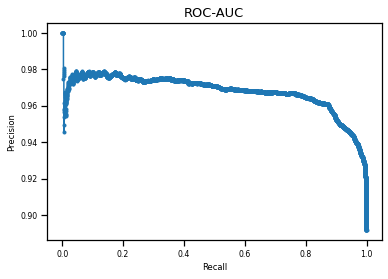

In [441]:
prediction_CB = model_CB.predict_proba(X_test)[:, 1]
precision, recall, th = precision_recall_curve(y_test, prediction_CB)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

In [442]:
# Строим предсказание модели

y_pred_train_CB = model_CB.predict(X_train)
y_pred_test_CB = model_CB.predict(X_test)

In [443]:
# Таблица сопряженности. Измеряем, насколько хороша модель

# Обучающая выборка

print(u'Таблица сопряженности для обучающей выборки')

conf_mat = metrics.confusion_matrix(y_train, y_pred_train_CB)
conf_mat = pd.DataFrame(conf_mat, index=model_CB.classes_, columns=model_CB.classes_)
conf_mat

Таблица сопряженности для обучающей выборки


,0.0,1.0
0.0,18688,409
1.0,6,18607


In [444]:
# Тестовая выборка

print(u'Таблица сопряженности для тестовой выборки')

conf_mat = metrics.confusion_matrix(y_test, y_pred_test_CB)
conf_mat = pd.DataFrame(conf_mat, index=model_CB.classes_, columns=model_CB.classes_)
conf_mat

Таблица сопряженности для тестовой выборки


,0.0,1.0
0.0,8650,852
1.0,22,9050


In [445]:
# Посчитаем precision, recall и f1-score для обучающей выборки

print(metrics.classification_report(y_train, y_pred_train_CB))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     19097
         1.0       0.98      1.00      0.99     18613

    accuracy                           0.99     37710
   macro avg       0.99      0.99      0.99     37710
weighted avg       0.99      0.99      0.99     37710



In [446]:
# Посчитаем precision, recall и f1-score для тестовой выборки

print(metrics.classification_report(y_test, y_pred_test_CB))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95      9502
         1.0       0.91      1.00      0.95      9072

    accuracy                           0.95     18574
   macro avg       0.96      0.95      0.95     18574
weighted avg       0.96      0.95      0.95     18574



In [447]:
# Посмотрим информативность

def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (10, len(feature_importances) * 0.5))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Важность')
    plt.title('Важность атрибута')
    plt.show()

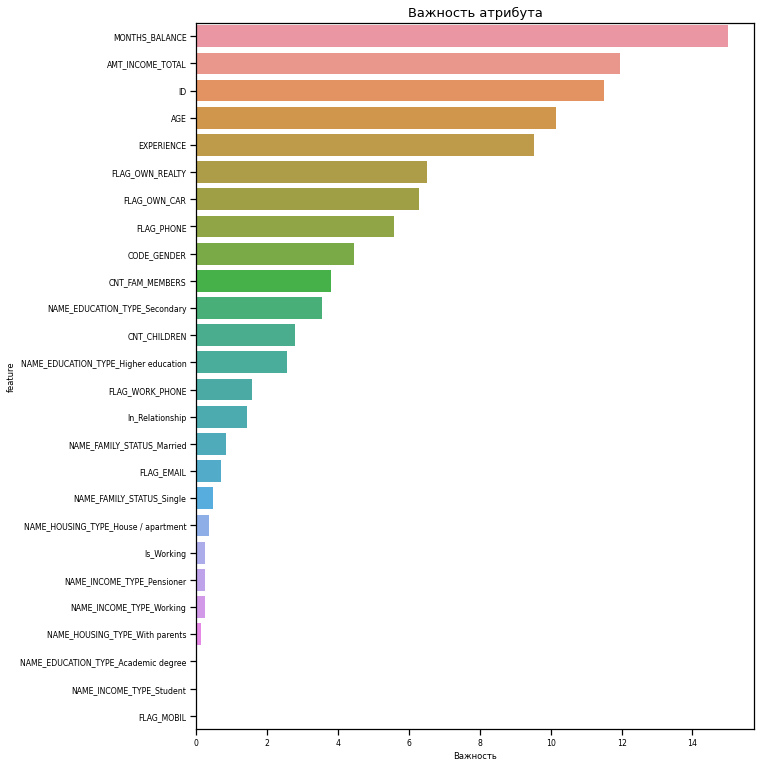

In [448]:
important_features_top = show_feature_importances(X.columns, model_CB.feature_importances_, get_top=15)

Результаты и выводы

В данной работе задача заключалась в классификации объекта на платежеспособных и неплатежеспособных клиентов банка для решения о выдаче кредитных карт. В качестве критерия сравнения результатов моделей была выбрана accuracy.
Лучшее accuracy показала модель CatBoost, основанная на градиентном бустинге. Показатели для обучающей выборки - 0.99, для тестовой - 0.95. Для XGBoost, KNN, Gradient Boosting показатели для обучающей и тестовой выборках составили соответственно (0.97,0.93), (0.94,0.89), (0.73,0.71). Также стоит отметить, что ни одна из моделей не переобучилась, т.к. разница в accuracy между тестовой и обучающей выборками составила менее 10%. Наиболее ценными признаками для классификации методом CatBoost являются: месяц, годовой доход, возраст, опыт работы, наличие недвижимости и автомобиля.

